## **🔬 Dataset Description**

### **🤗 Description from Hugging Face**

Polar sentiment dataset of sentences from financial news. The dataset consists of 4840 sentences from English language financial news categorised by sentiment. The dataset is divided by agreement rate of 5-8 annotators.

- 0 Negative
- 1 Neutral
- 2 Positive

### **✂️ Data Splits**

There's no train/validation/test split.

However the dataset is available in four possible configurations depending on the percentage of agreement of annotators:

- `sentences_50agree` Number of instances with >=50% annotator agreement: 4846 
- `sentences_66agree` Number of instances with >=66% annotator agreement: 4217 
- `sentences_75agree` Number of instances with >=75% annotator agreement: 3453 
- `sentences_allagree` Number of instances with 100% annotator agreement: 2264

The code below export all splits into csv files:


In [4]:
from datasets import load_dataset

splits = [
    "sentences_50agree",
    "sentences_66agree",
    "sentences_75agree",
    "sentences_allagree"
]

for split in splits:
    ds = load_dataset(
        "takala/financial_phrasebank",
        name=split,     # This is the agreement level
        trust_remote_code=True
    )

    ds['train'].to_csv(f'data/financial_phrasebank_{split}.csv')

Creating CSV from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

### **📂 Load File (financial_phrasebank_sentences_50agree)**

In [5]:
import os
import pandas as pd

file_path = "data/financial_phrasebank_sentences_50agree.csv"
df = pd.read_csv(file_path)
        
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (4846, 2)
Columns: ['sentence', 'label']


### **ℹ️ Basic Info**

In [6]:
df.head()


,sentence,label
0,"According to Gran , the company has no plans t...",1
1,Technopolis plans to develop in stages an area...,1
2,The international electronic industry company ...,0
3,With the new production plant the company woul...,2
4,According to the company 's updated strategy f...,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  4846 non-null   object
 1   label     4846 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.8+ KB


In [8]:
df.describe()

,label
count,4846.000000
mean,1.156624
std,0.617616
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


### **📊 Distribution of Labels**

As expected, the dataset is imbalanced, with a higher number of neutral sentences compared to positive and negative ones. This is common in sentiment analysis datasets, especially in financial contexts where neutral (54.9%) statements are more frequent.

In [16]:
# Map numeric labels to sentiment names
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
df['label_name'] = df['label'].map(label_map)

percentages = df['label_name'].value_counts(normalize=True) * 100
percentages.round(2)

label_name
Neutral     59.41
Positive    28.13
Negative    12.46
Name: proportion, dtype: float64

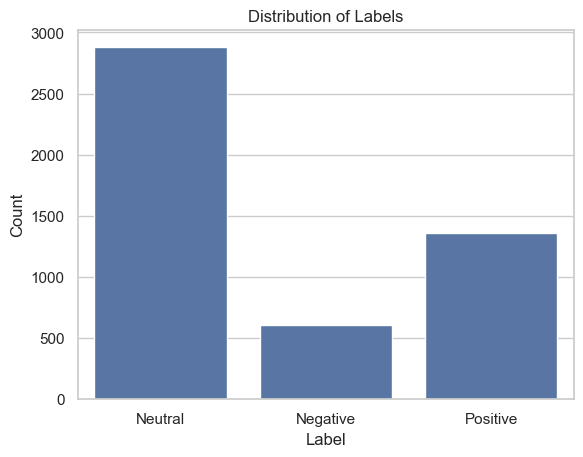

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt




sns.countplot(data=df, x='label_name')
sns.set(style="whitegrid")
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### **🔠 Most frequent words**

The more frequent words in the dataset correspond to the most frequent words in the English language, such as "the", "and", "to", "of", etc. So we can perfom a stopword removal to focus on the more meaningful words in the dataset.

Text(0.5, 0, 'Words')

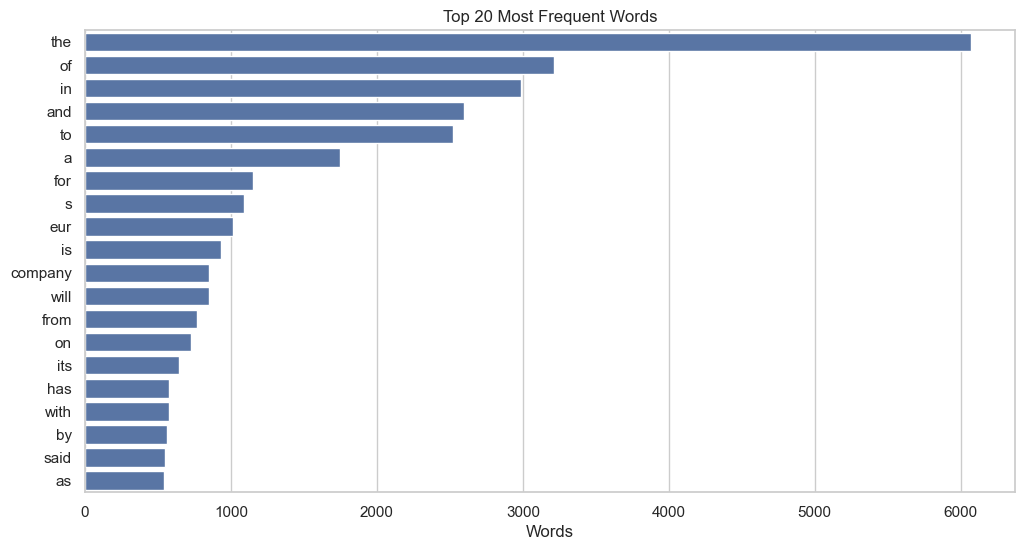

In [10]:
import pandas as pd
from collections import Counter
import re

# Tokenization: split sentences into words, convert to lowercase, and remove unwanted characters
def tokenize(text):
    # Converts text to lowercase and extracts words only (ignores numbers and punctuation)
    return re.findall(r'\b[a-záéíóúüñ]+\b', text.lower())

all_words = []
for sentence in df['sentence']:
    all_words.extend(tokenize(sentence))

# Count word frequency
counter = Counter(all_words)
most_common = counter.most_common(20)  # Top 20 most frequent words

plt.figure(figsize=(12, 6))
vertical = True  # Set to True for vertical bars, False for horizontal
if vertical:
    sns.set_style(style="whitegrid")  
sns.barplot(y=[word for word, freq in most_common], x=[freq for word, freq in most_common])

plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')     


### **🔠 Most frequent words without stopwords**

After applying stopwords removal, we can visualize the most common words again. This time, we will find words like eur, sales, and other financial terms that are more relevant to the dataset.

Finding eur instead of dollars or USD, shows that  the dataset is probably more focus on European financial.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adral\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 0, 'Words')

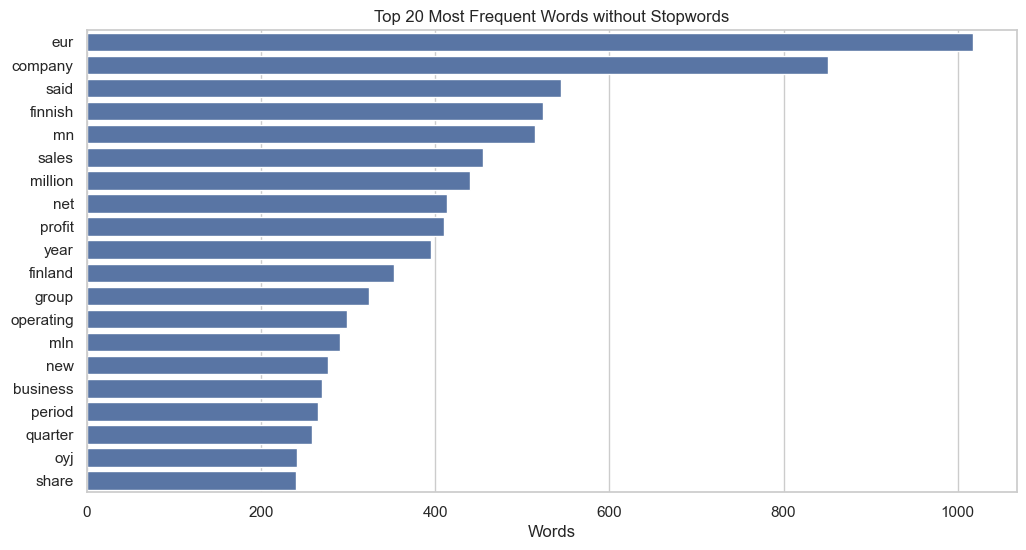

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Get list of English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords from the word list
filtered_words = [w for w in all_words if w not in stop_words]
filtered_counter = Counter(filtered_words)
most_common_filtered = filtered_counter.most_common(20)

plt.figure(figsize=(12, 6))
vertical = True  # Set to True for vertical bars, False for horizontal
if vertical:
    sns.set_style(style="whitegrid")  
sns.barplot(y=[word for word, freq in most_common_filtered], x=[freq for word, freq in most_common_filtered])

plt.title('Top 20 Most Frequent Words without Stopwords')
plt.xlabel('Words')     